added pyarrow to work with the newer engine and dtype backend

In [2]:
! pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 118.3 kB/s eta 0:00:00m eta 0:00:010:00:10


In [1]:
import pandas as pd
import requests
import numpy as np

/tmp/ipykernel_45184/3891804190.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Define the URL
url = "https://gadgetpharmacy.sbohlooli.ir/api/raw_data?option=heartrate&dev_id=reza1379&user_id=1461032677&interval=2592000"


response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)



In [127]:
%%time
def fixed_mean_calculation(df ,last = '1W'):
    
    df['x_data'] = pd.to_datetime(df['x_data'], unit='ms')
    
    df = df.set_index('x_data')
    df = df.last(last)
    filtered_df_1= df.between_time('23:59', '08:00')
    filtered_df_2= df.between_time('08:00', '12:00')
    filtered_df_3= df.between_time('12:00', '16:00')
    filtered_df_4= df.between_time('16:00', '20:00')
    filtered_df_5= df.between_time('20:00', '23:59')
    daily_mean_hr1 = int(filtered_df_1['y_data'].mean())
    daily_mean_hr2 = int(filtered_df_2['y_data'].mean())
    daily_mean_hr3 = int(filtered_df_3['y_data'].mean())
    daily_mean_hr4 = int(filtered_df_4['y_data'].mean())
    daily_mean_hr5 = int(filtered_df_5['y_data'].mean())
    daily_mean_step1 = int(filtered_df_1['step'].mean())
    daily_mean_step2 = int(filtered_df_2['step'].mean())
    daily_mean_step3 = int(filtered_df_3['step'].mean())
    daily_mean_step4 = int(filtered_df_4['step'].mean())
    daily_mean_step5 = int(filtered_df_5['step'].mean())
    return daily_mean_hr1 ,daily_mean_hr2, daily_mean_hr3, daily_mean_hr4, daily_mean_hr5 ,daily_mean_step1 , daily_mean_step2 , daily_mean_step3 ,daily_mean_step4 , daily_mean_step5
x = fixed_mean_calculation(df)
print (x)

(65, 78, 75, 67, 54, 5, 7, 6, 3, 0)
CPU times: user 41.3 ms, sys: 7 µs, total: 41.3 ms
Wall time: 38.2 ms


<timed exec>:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead


In [24]:
print(df.memory_usage(deep = True).sum())
df['x_data'] = pd.to_datetime(df['x_data'], unit='ms')
df = df.set_index('x_data' , inplace=False )
print(df)
print(df.memory_usage(deep = True).sum())

3380505
                        user_id  y_data  step
x_data                                       
2024-01-24 13:07:00  1461032677      79     0
2024-01-24 13:08:00  1461032677      78    27
2024-01-24 13:09:00  1461032677      80     0
2024-01-24 13:10:00  1461032677      84     0
2024-01-24 13:11:00  1461032677      80     0
...                         ...     ...   ...
2024-02-23 13:02:00  1461032677      71     0
2024-02-23 13:03:00  1461032677      73     0
2024-02-23 13:04:00  1461032677      75     0
2024-02-23 13:05:00  1461032677      74     0
2024-02-23 13:06:00  1461032677      80    57

[37147 rows x 3 columns]
3380377


In [6]:
%%time
def fixed_mean_calculation(df):
    df['x_data'] = pd.to_datetime(df['x_data'], unit='ms')   
    df = df.set_index('x_data')
    hr_quantile = df['y_data'].quantile(0.9)
    hr_min = df['y_data'].min()
    hr_mean_1= int(df['y_data'].loc[(df.index.hour>=23) | (df.index.hour< 8)].mean())
    hr_mean_2= int(df['y_data'].loc[(df.index.hour>=8) & (df.index.hour< 12)].mean())
    hr_mean_3= int(df['y_data'].loc[(df.index.hour>=12) & (df.index.hour< 16)].mean())
    hr_mean_4= int(df['y_data'].loc[(df.index.hour>=16) & (df.index.hour< 20)].mean())
    hr_mean_5= int(df['y_data'].loc[(df.index.hour>=20) & (df.index.hour< 23)].mean())
    step_quantile = df['step'].quantile(0.9)
    step_min = df['step'].min()
    step_mean_1 = int(df['step'].loc[(df.index.hour>=23) | (df.index.hour< 8)].mean())
    step_mean_2 = int(df['step'].loc[(df.index.hour>=8) & (df.index.hour< 12)].mean())
    step_mean_3 = int(df['step'].loc[(df.index.hour>=12) & (df.index.hour< 16)].mean())
    step_mean_4 = int(df['step'].loc[(df.index.hour>=16) & (df.index.hour< 20)].mean())
    step_mean_5 = int(df['step'].loc[(df.index.hour>=20) & (df.index.hour< 23)].mean())
    return hr_mean_1 , hr_mean_2 , hr_mean_3 , hr_mean_4 , hr_mean_5 , step_mean_1 , step_mean_2 , step_mean_3 , step_mean_4 , step_mean_5 , step_quantile , hr_quantile , step_min , hr_min

# def fixed_mean_calculation(df):
#     df['x_data'] = pd.to_datetime(df['x_data'], unit='ms')   
#     df = df.set_index('x_data')
#     hr_quantile = df['y_data'].quantile(0.9)
#     hr_min = df['y_data'].min()
#     hr_mean_1= df['y_data'].loc[(df.index.hour>=23) | (df.index.hour< 8)].mean()
#     hr_mean_2= df['y_data'].loc[(df.index.hour>=8) & (df.index.hour< 12)].mean()
#     hr_mean_3= df['y_data'].loc[(df.index.hour>=12) & (df.index.hour< 16)].mean()
#     hr_mean_4= df['y_data'].loc[(df.index.hour>=16) & (df.index.hour< 20)].mean()
#     hr_mean_5= df['y_data'].loc[(df.index.hour>=20) & (df.index.hour< 23)].mean()
#     step_quantile = df['step'].quantile(0.9)
#     step_min = df['step'].min()
#     step_mean_1 = df['step'].loc[(df.index.hour>=23) | (df.index.hour< 8)].mean()
#     step_mean_2 = df['step'].loc[(df.index.hour>=8) & (df.index.hour< 12)].mean()
#     step_mean_3 = df['step'].loc[(df.index.hour>=12) & (df.index.hour< 16)].mean()
#     step_mean_4 = df['step'].loc[(df.index.hour>=16) & (df.index.hour< 20)].mean()
#     step_mean_5 = df['step'].loc[(df.index.hour>=20) & (df.index.hour< 23)].mean()
#     return hr_mean_1 , hr_mean_2 , hr_mean_3 , hr_mean_4 , hr_mean_5 , step_mean_1 , step_mean_2 , step_mean_3 , step_mean_4 , step_mean_5 , step_quantile , hr_quantile , step_min , hr_min


x = fixed_mean_calculation(df)
print (x)



(63, 77, 76, 68, 56, 4, 8, 6, 4, 1, 17.0, 88.0, 0, 20)
CPU times: user 26.2 ms, sys: 0 ns, total: 26.2 ms
Wall time: 25.4 ms


In [5]:
%%timeit
def sleepstaging (df , hr_weight = 3 , movement_weight = 5 , sd_weight = 0.5 , resting_hr_weight = 2  , window_size = 50 ) :
    """"
    function for detecting sleep and wake based on heart rate .
    the function uses score based system to score each pair of heart rate and timestamp with percent .
    values have been normalaized .

    """
    df['RollingSD'] = df['y_data'].rolling(window=window_size, center=True).std()
    total_weight = hr_weight + movement_weight + sd_weight + resting_hr_weight
    resting_hr = 60  # change this for sure
    # Iterate through each data point
    for i in range(len(df)):
        # start and end indices for the window centered around the current data point
        start_idx = max(0, i - window_size // 2)
        end_idx = min(len(df), i + window_size // 2)
        window = df.iloc[start_idx:end_idx]
        
        # Normalize the features
        movement_range = window['step'].max() - window['step'].min()
        if movement_range == 0:
            normalized_movement = 1
        else:
            normalized_movement = 1 - (df['step'][i] - window['step'].min()) / movement_range        
        # Normalize the features
        normalized_hr = (df['y_data'][i] - window['y_data'].min()) / (window['y_data'].max() - window['y_data'].min())
        normalized_sd = (df['RollingSD'][i] - window['RollingSD'].min()) / (window['RollingSD'].max() - window['RollingSD'].min())
        resting_hr_distance = (resting_hr - df['y_data'][i]) / (df['y_data'].max() - df['y_data'].min())
        resting_hr_distance = max(0, min(1, resting_hr_distance))  # Clamping to [0, 1] range
        
        # Sleep Score
        sleep_score = movement_weight * normalized_movement + hr_weight * (1 - normalized_hr) + sd_weight * (1 - normalized_sd) + resting_hr_weight * resting_hr_distance
              
        # # Wake Score
        # wake_score = hr_weight * normalized_hr + sd_weight * normalized_sd + resting_hr_weight * resting_hr_distance
        
        # scores to percentages
        df.at[i, 'SleepProbability'] = sleep_score / total_weight
        df.at[i, 'WakeProbability'] = 100 - (sleep_score / total_weight)
    
    return df

y = sleepstaging(df)
print(y)


          user_id         x_data  y_data  step  RollingSD  SleepProbability  \
0      1461032677  1706101620000      79     0        NaN               NaN   
1      1461032677  1706101680000      78    27        NaN               NaN   
2      1461032677  1706101740000      80     0        NaN               NaN   
3      1461032677  1706101800000      84     0        NaN               NaN   
4      1461032677  1706101860000      80     0        NaN               NaN   
...           ...            ...     ...   ...        ...               ...   
37142  1461032677  1708693320000      71     0        NaN               NaN   
37143  1461032677  1708693380000      73     0        NaN               NaN   
37144  1461032677  1708693440000      75     0        NaN               NaN   
37145  1461032677  1708693500000      74     0        NaN               NaN   
37146  1461032677  1708693560000      80    57        NaN               NaN   

       WakeProbability  
0                  NaN  
1

KeyboardInterrupt: 

In [19]:
%%time

def sleepstaging(df, hr_weight=3, movement_weight=5, sd_weight=0.5, resting_hr_weight=2, window_size=5):
    """
    Function for detecting sleep and wake based on heart rate.
    The function uses a score-based system to score each pair of heart rate and timestamp with percent.
    Values have been normalized.
    """
    # Calculate rolling standard deviation
    df['RollingSD'] = df['y_data'].rolling(window=window_size, center=True).std()

    total_weight = hr_weight + movement_weight + sd_weight + resting_hr_weight
    resting_hr = 60  # change this for sure

    # Calculate min, max, and range for each window
    rolling_min = df[['y_data', 'step', 'RollingSD']].rolling(window=window_size, center=True).min()
    rolling_max = df[['y_data', 'step', 'RollingSD']].rolling(window=window_size, center=True).max()
    rolling_range = rolling_max - rolling_min

    # Handle division by zero
    rolling_range[rolling_range == 0] = 1

    # Normalize the features
    normalized_movement = 1 - (df['step'] - rolling_min['step']) / rolling_range['step']
    normalized_hr = (df['y_data'] - rolling_min['y_data']) / rolling_range['y_data']
    normalized_sd = (df['RollingSD'] - rolling_min['RollingSD']) / rolling_range['RollingSD']
    resting_hr_distance = (resting_hr - df['y_data']) / rolling_range['y_data']
    resting_hr_distance = np.clip(resting_hr_distance, 0, 1)  # Clamping to [0, 1] range

    # Sleep Score
    sleep_score = movement_weight * normalized_movement + hr_weight * (1 - normalized_hr) + sd_weight * (1 - normalized_sd) + resting_hr_weight * resting_hr_distance

    # Scores to percentages
    df['SleepProbability'] = sleep_score / total_weight
    df['WakeProbability'] = 100 - df['SleepProbability']

    return df

y = sleepstaging(df)
print(y.head(50))
print(y.memory_usage(deep = True).sum())

       user_id         x_data  y_data  step  RollingSD  SleepProbability  \
0   1461032677  1706101620000      79     0        NaN               NaN   
1   1461032677  1706101680000      78    27        NaN               NaN   
2   1461032677  1706101740000      80     0   2.280351               NaN   
3   1461032677  1706101800000      84     0   4.774935               NaN   
4   1461032677  1706101860000      80     0   5.291503          0.692912   
5   1461032677  1706101920000      90     0   6.164414          0.501778   
6   1461032677  1706101980000      76     0   6.379655          0.775302   
7   1461032677  1706102040000      75     0   7.778175          0.779292   
8   1461032677  1706102100000      75     0   8.706320          0.761905   
9   1461032677  1706102160000      89     0   8.136338          0.554643   
10  1461032677  1706102220000      93     0   7.190271          0.515982   
11  1461032677  1706102280000      82     0   6.892024          0.708683   
12  14610326

0        0
1        0
2        0
3        0
4        0
        ..
37142    0
37143    0
37144    0
37145    0
37146    0
Name: BinarySleep, Length: 37147, dtype: int64
297304


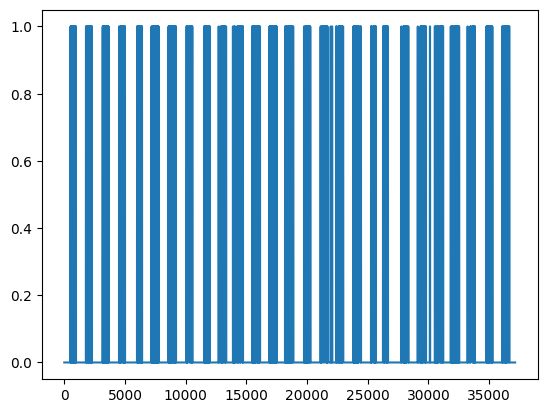

CPU times: user 180 ms, sys: 200 ms, total: 381 ms
Wall time: 178 ms


In [33]:
%%time
def binarysleep_with_denoise(df, threshold=0.8, window_size=10):
    df['BinarySleep'] = 0
    df.loc[df['SleepProbability'] >= threshold, 'BinarySleep'] = 1
    df['BinarySleep'] = df['BinarySleep'].rolling(window=window_size, center=True, min_periods=1).mean()
    df['BinarySleep'] = (df['BinarySleep'] >= 0.5).astype(int)
    return df['BinarySleep']


u = binarysleep_with_denoise(y)
print (u)
print(u.memory_usage(deep = True))
import matplotlib.pyplot as plt

u.value_counts()
u.plot()
plt.show()
